In [235]:
import mysql.connector 
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import config
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [2]:
cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database= 'Dog_Breeds'
)
cursor = cnx.cursor()

# cursor.close()
# cnx.close()

In [3]:
sq= """SELECT * FROM Dogs"""
cursor.execute(sq)
sql=cursor.fetchall()

In [4]:
df= pd.DataFrame(sql)
df.columns = ["Name", "Male_Min_Weight", "Female_Min_Weight", "Male_Max_Weight", "Female_Max_Weight","Male_Height", "Female_Height", "Exercise_Min_Min_Daily", 
              "Exercise_Max_Min_Daily",
    "Energy_Level", "Longevity_Min", "Longevity_Max",
              "Tend_Drool", "Tend_Snore", "Tend_Bark", "Tend_Dig", "Attention_Needs", "Grooming_Needs", "AKC_Class", "UKC_Class", "Prevalence"]

In [5]:
# run code Twice, once with non AKC as a labaled "Not AKC classified."
df=df[df.AKC_Class != '<p> <strong>UKC Classification</strong>']

In [6]:
df

,Name,Male_Min_Weight,Female_Min_Weight,Male_Max_Weight,Female_Max_Weight,Male_Height,Female_Height,Exercise_Min_Min_Daily,Exercise_Max_Min_Daily,Energy_Level,...,Longevity_Max,Tend_Drool,Tend_Snore,Tend_Bark,Tend_Dig,Attention_Needs,Grooming_Needs,AKC_Class,UKC_Class,Prevalence
0,affenpinscher,7,14,9,20,10,10,20,40,Very energet,...,14,Low,Low,High,Low,High,Moderate,Toy,Dog,So-so
1,afghan-hound,55,14,65,20,27,25,40,40,Average,...,14,Low,Low,Low,Low,Low,High,Hound,Sighthounds and Pariahs<br/> <strong>Pre,So-so</p>
2,airedale-terrier,44,14,50,20,23,22,40,40,Very energet,...,13,Low,Low,Moderate,High,High,Moderate,Terrier,Terrier<br/> <strong>Prevalence</strong>,So-so</p>
4,akita,85,14,130,20,27,25,0,0,Average,...,12,Low,Low,Low,Low,Moderate,Moderate,Working,Northern Breeds,Common
6,american-eskimo,0,14,0,20,0,0,20,40,Average,...,14,Low,Low,Moderate,Moderate,High,Moderate,Non-Sporting,Northern Breeds,So-so
8,american-water-spaniel,30,14,45,20,18,17,20,40,Very energet,...,13,High,Low,High,Low,Moderate,Low,Sporting,Gun Dog,Rare
9,australia-shepherd,50,14,65,20,22,20,40,40,Very energet,...,14,Moderate,Unknown,Unknown,Low,High,Moderate,Herding,Herding Dog,Common
10,australian-cattle-dog,35,14,45,20,19,18,40,40,Very energet,...,13,Low,Low,Low,Low,Moderate,Moderate,Herding,Herding Dog,So-so
11,basenji,21,14,24,20,17,16,40,40,Very energet,...,14,Low,Low,Low,Low,Moderate,Low,Hound,Sighthounds and Pariahs,So-so
12,basset-hound,40,14,60,20,14,13,0,0,Laid back,...,12,High,Low,Low,Low,Moderate,Low,Hound,Scenthounds<br/> <strong>Prevalence</str,Common</p>


In [7]:
# Changing low medium high ranking to 0 ,1 ,2 respectivly

df['Tend_Drool'] = df['Tend_Drool'].map({'Low': 0, 'Moderate': 1, "High": 2})
df['Tend_Snore'] = df['Tend_Snore'].map({'Low': 0, 'Moderate': 1, "High": 2})
df['Tend_Dig'] = df['Tend_Dig'].map({'Low': 0, 'Moderate': 1, "High": 2})
df['Attention_Needs'] = df['Attention_Needs'].map({'Low': 0, 'Moderate': 1, "High": 2})
df['Tend_Bark'] = df['Tend_Bark'].map({'Low': 0, 'Moderate': 1, "High": 2, "Unknown": 1})
df['Grooming_Needs'] = df['Grooming_Needs'].map({'Low': 0, 'Moderate': 1, "High": 2, "Unknown": 1})

# breeds with years were checked by hand. terrier and working respectivly
df['Energy_Level'] = df['Energy_Level'].map({'Very energet': 2, 'Average': 1, "Laid back ": 0, "Very Energet": 2, "Average.": 1, "high": 2, 
                                             "Laid Back": 0, "Moderate": 1, "Active": 2, "12-14 yrs": 1, "Bred to work": 2, "High": 2, "low to moder": 0, "10-13 yrs.": 2 })

                                             
                                             
                                             
                                             
df['Prevalence'] = df['Prevalence'].map({'Common': 0, 'So-so': 1, "Rare": 2, "Common</p>": 0, "So-so</p>.": 1, "Common.": 0,
                                         
     "So-So.": 1, 
    "So-so.": 1, "Rare.": 2, "So-so.</p>": 1, "Rare</p>": 2})    
                                             
                            

In [8]:
df=df.replace(to_replace ="Non-Sporting", 
                 value ="Non-sporting") 
df=df.replace(to_replace ="companion", 
                 value ="Non-sporting") 
df=df.replace(to_replace ="Working.", 
                 value ="Working") 

df=df.replace(to_replace ="Toy.", 
                 value ="Toy") 


df=df.replace(to_replace ="Terrier.", 
                 value ="Terrier") 


df=df.replace(to_replace ="Hound.", 
                 value ="Hound") 









In [9]:
df= df.drop(['UKC_Class', "Name"], axis=1)

In [258]:
df.AKC_Class.value_counts()

Toy             17
Terrier         17
Hound           16
Working         15
Sporting        13
Herding         13
Non-sporting     6
Name: AKC_Class, dtype: int64

In [263]:
df['target']=['group1' if i =="Toy" else "group2" if i == "Working" or i == "Sporting" else "group3" for i in df.AKC_Class]
   
   
   
   
   

In [266]:
df= df.drop("AKC_Class", axis=1)

In [267]:
df

,Male_Min_Weight,Female_Min_Weight,Male_Max_Weight,Female_Max_Weight,Male_Height,Female_Height,Exercise_Min_Min_Daily,Exercise_Max_Min_Daily,Energy_Level,Longevity_Min,Longevity_Max,Tend_Drool,Tend_Snore,Tend_Bark,Tend_Dig,Attention_Needs,Grooming_Needs,Prevalence,target
0,7,14,9,20,10,10,20,40,2.0,12,14,0.0,0.0,2.0,0.0,2.0,1.0,1.0,group1
1,55,14,65,20,27,25,40,40,1.0,12,14,0.0,0.0,0.0,0.0,0.0,2.0,1.0,group3
2,44,14,50,20,23,22,40,40,2.0,10,13,0.0,0.0,1.0,2.0,2.0,1.0,1.0,group3
4,85,14,130,20,27,25,0,0,1.0,10,12,0.0,0.0,0.0,0.0,1.0,1.0,0.0,group2
6,0,14,0,20,0,0,20,40,1.0,12,14,0.0,0.0,1.0,1.0,2.0,1.0,1.0,group3
8,30,14,45,20,18,17,20,40,2.0,10,13,2.0,0.0,2.0,0.0,1.0,0.0,2.0,group2
9,50,14,65,20,22,20,40,40,2.0,12,14,1.0,1.0,1.0,0.0,2.0,1.0,0.0,group3
10,35,14,45,20,19,18,40,40,2.0,10,13,0.0,0.0,0.0,0.0,1.0,1.0,1.0,group3
11,21,14,24,20,17,16,40,40,2.0,12,14,0.0,0.0,0.0,0.0,1.0,0.0,1.0,group3
12,40,14,60,20,14,13,0,0,1.0,8,12,2.0,0.0,0.0,0.0,1.0,0.0,0.0,group3


In [10]:
df.AKC_Class.value_counts()

Toy             17
Terrier         17
Hound           16
Working         15
Sporting        13
Herding         13
Non-sporting     6
Name: AKC_Class, dtype: int64

In [11]:
df=df.fillna(1)

In [335]:
Y= df.target
X= df.drop("target", axis=1)
for i in list(X.columns):
    X[i].astype(float)

# Data Cleaning on graphs

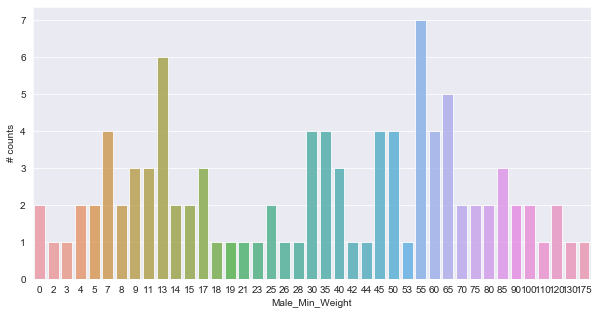

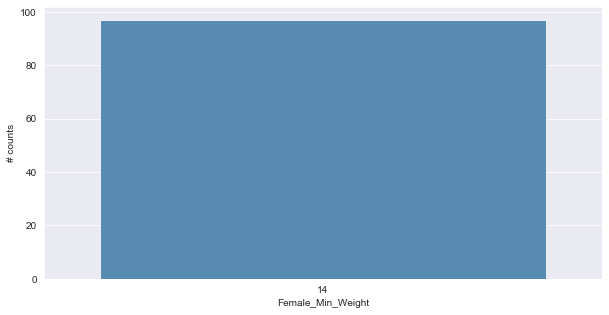

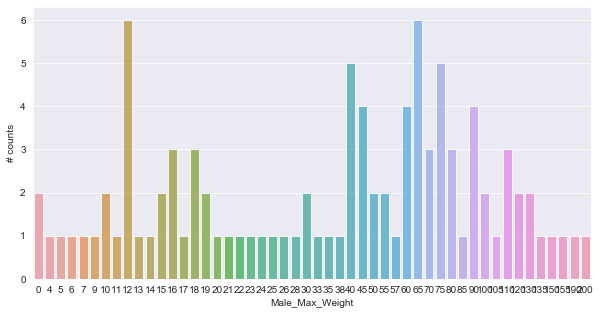

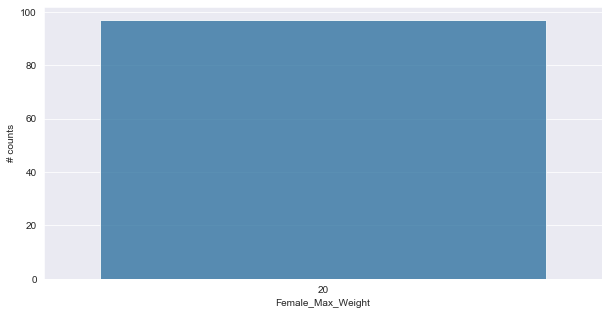

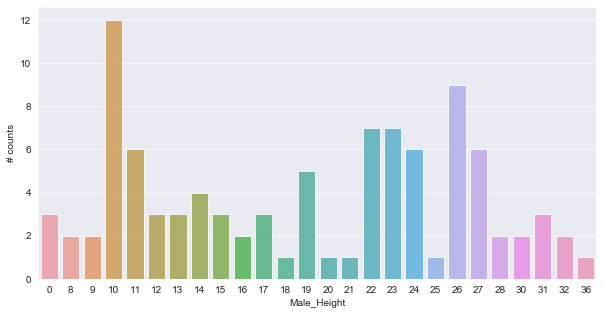

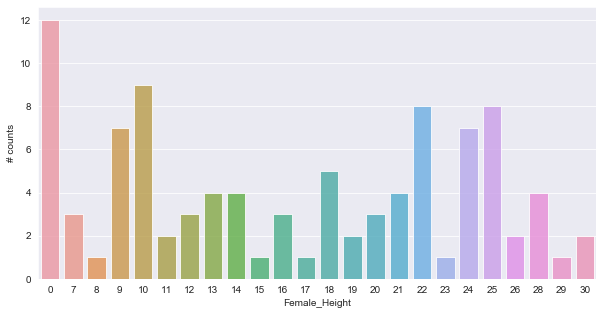

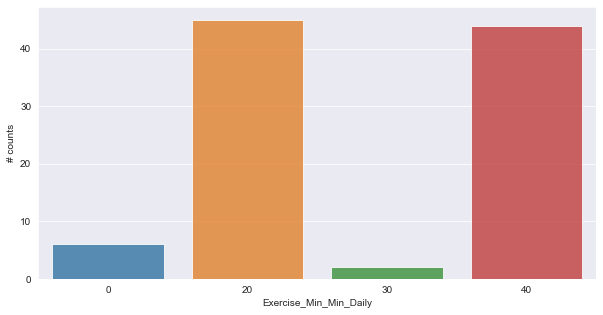

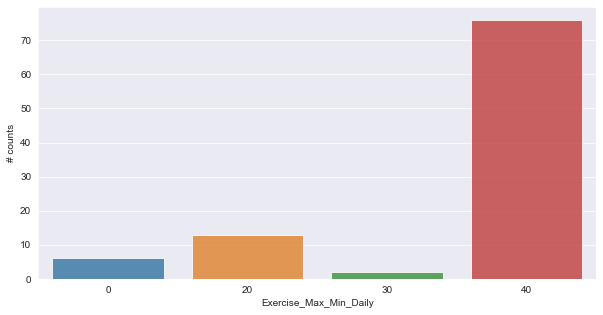

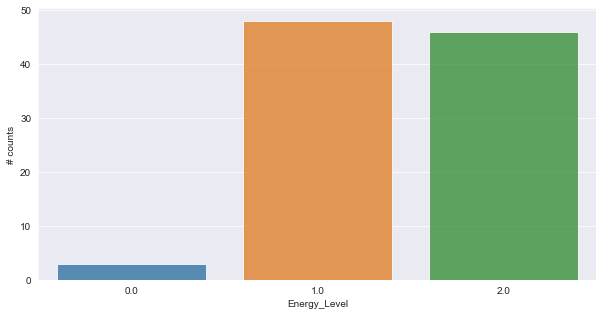

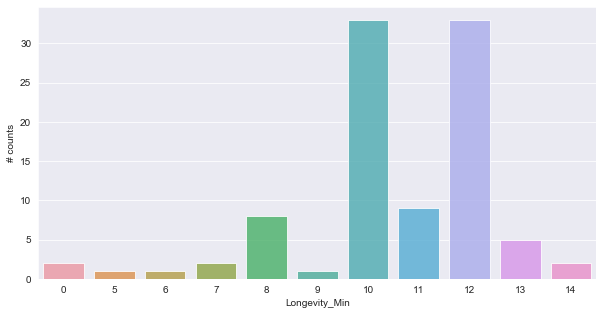

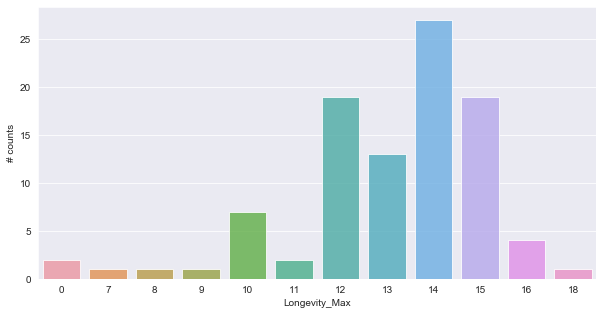

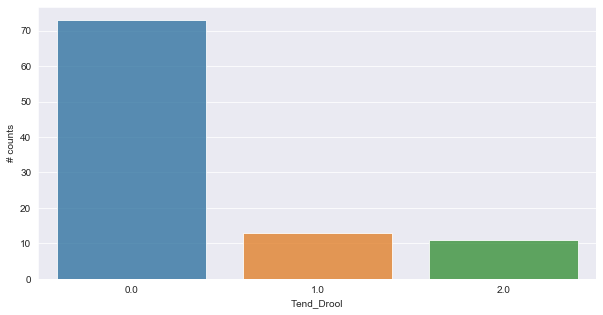

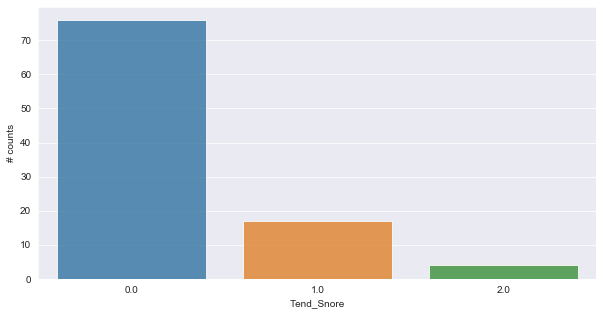

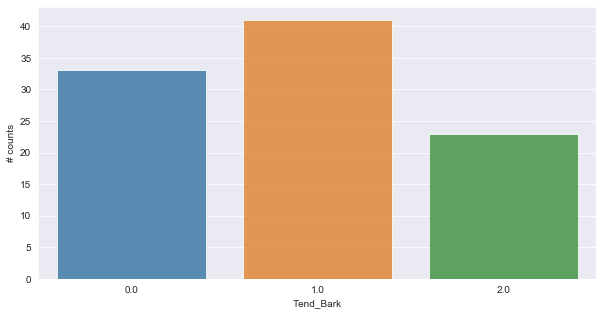

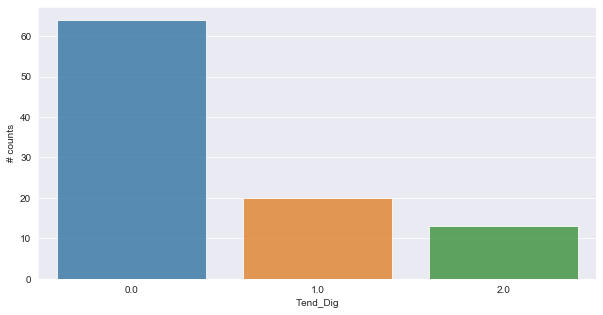

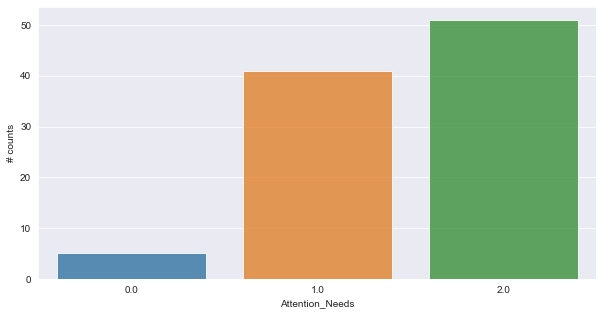

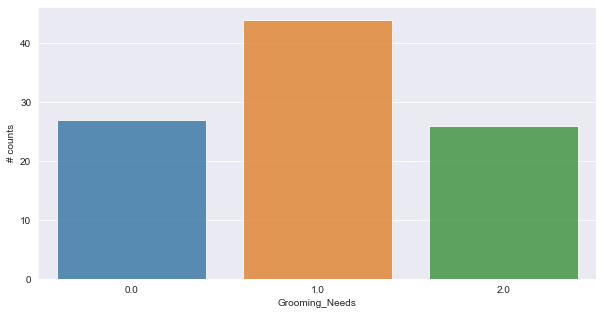

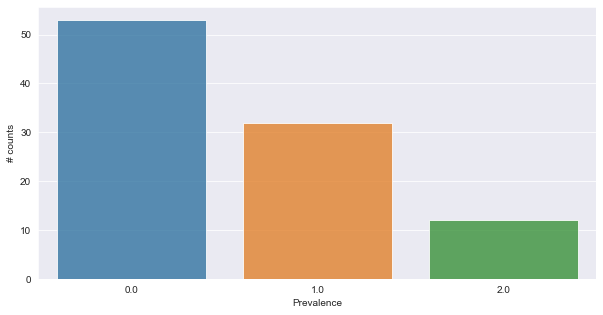

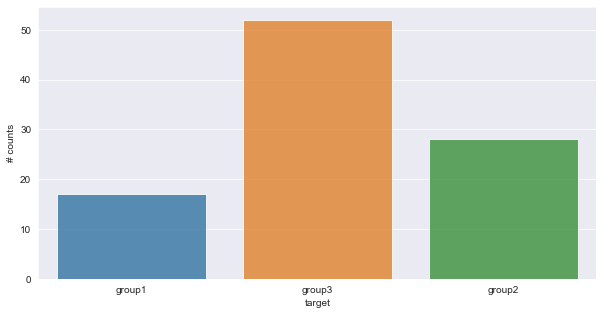

In [492]:
#Data exploration on graphs
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

for column in list(df.columns):
    plt.figure(figsize = (10,5))
    sns.countplot(df[column], alpha =.80)
#     plt.title('Survivors vs Non-Survivors')
    plt.ylabel('# counts')
    plt.show()

# Decision Tree

In [336]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [354]:
clf= DecisionTreeClassifier(max_depth= 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [271]:
clf_pred= clf.predict(X_test)
from sklearn.model_selection import GridSearchCV

In [272]:
def gridsearchCV(model):
    param_grid={
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 12],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6]}
    return GridSearchCV(model,param_grid, cv=3)

In [273]:
clf_grid=gridsearchCV(clf)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 12],
                      

In [274]:
clf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [275]:
clf_grid_pred= clf_grid.predict(X_test)

In [276]:
accuracy_score(y_test, clf_grid_pred)
# precision_score(y_test, clf_grid_pred, average='micro')
# recall_score(y_test, clf_grid_pred, average='macro')
# f1_score(y_test, clf_grid_pred, average='weighted')

0.55

In [361]:
evaluate(y_test, clf_grid_pred, 'Decision Tree')

['Decision Tree',
 array([0.8       , 0.36363636, 0.75      ]),
 array([1.        , 0.8       , 0.27272727]),
 0.55,
 array([0.88888889, 0.5       , 0.4       ])]

In [277]:
# accuracy_score(y_test, clf_pred)
# precision_score(y_test, clf_pred, average='micro')
# recall_score(y_test, clf_pred, average='macro')
f1_score(y_test, clf_pred, average='weighted')

0.6982905982905983

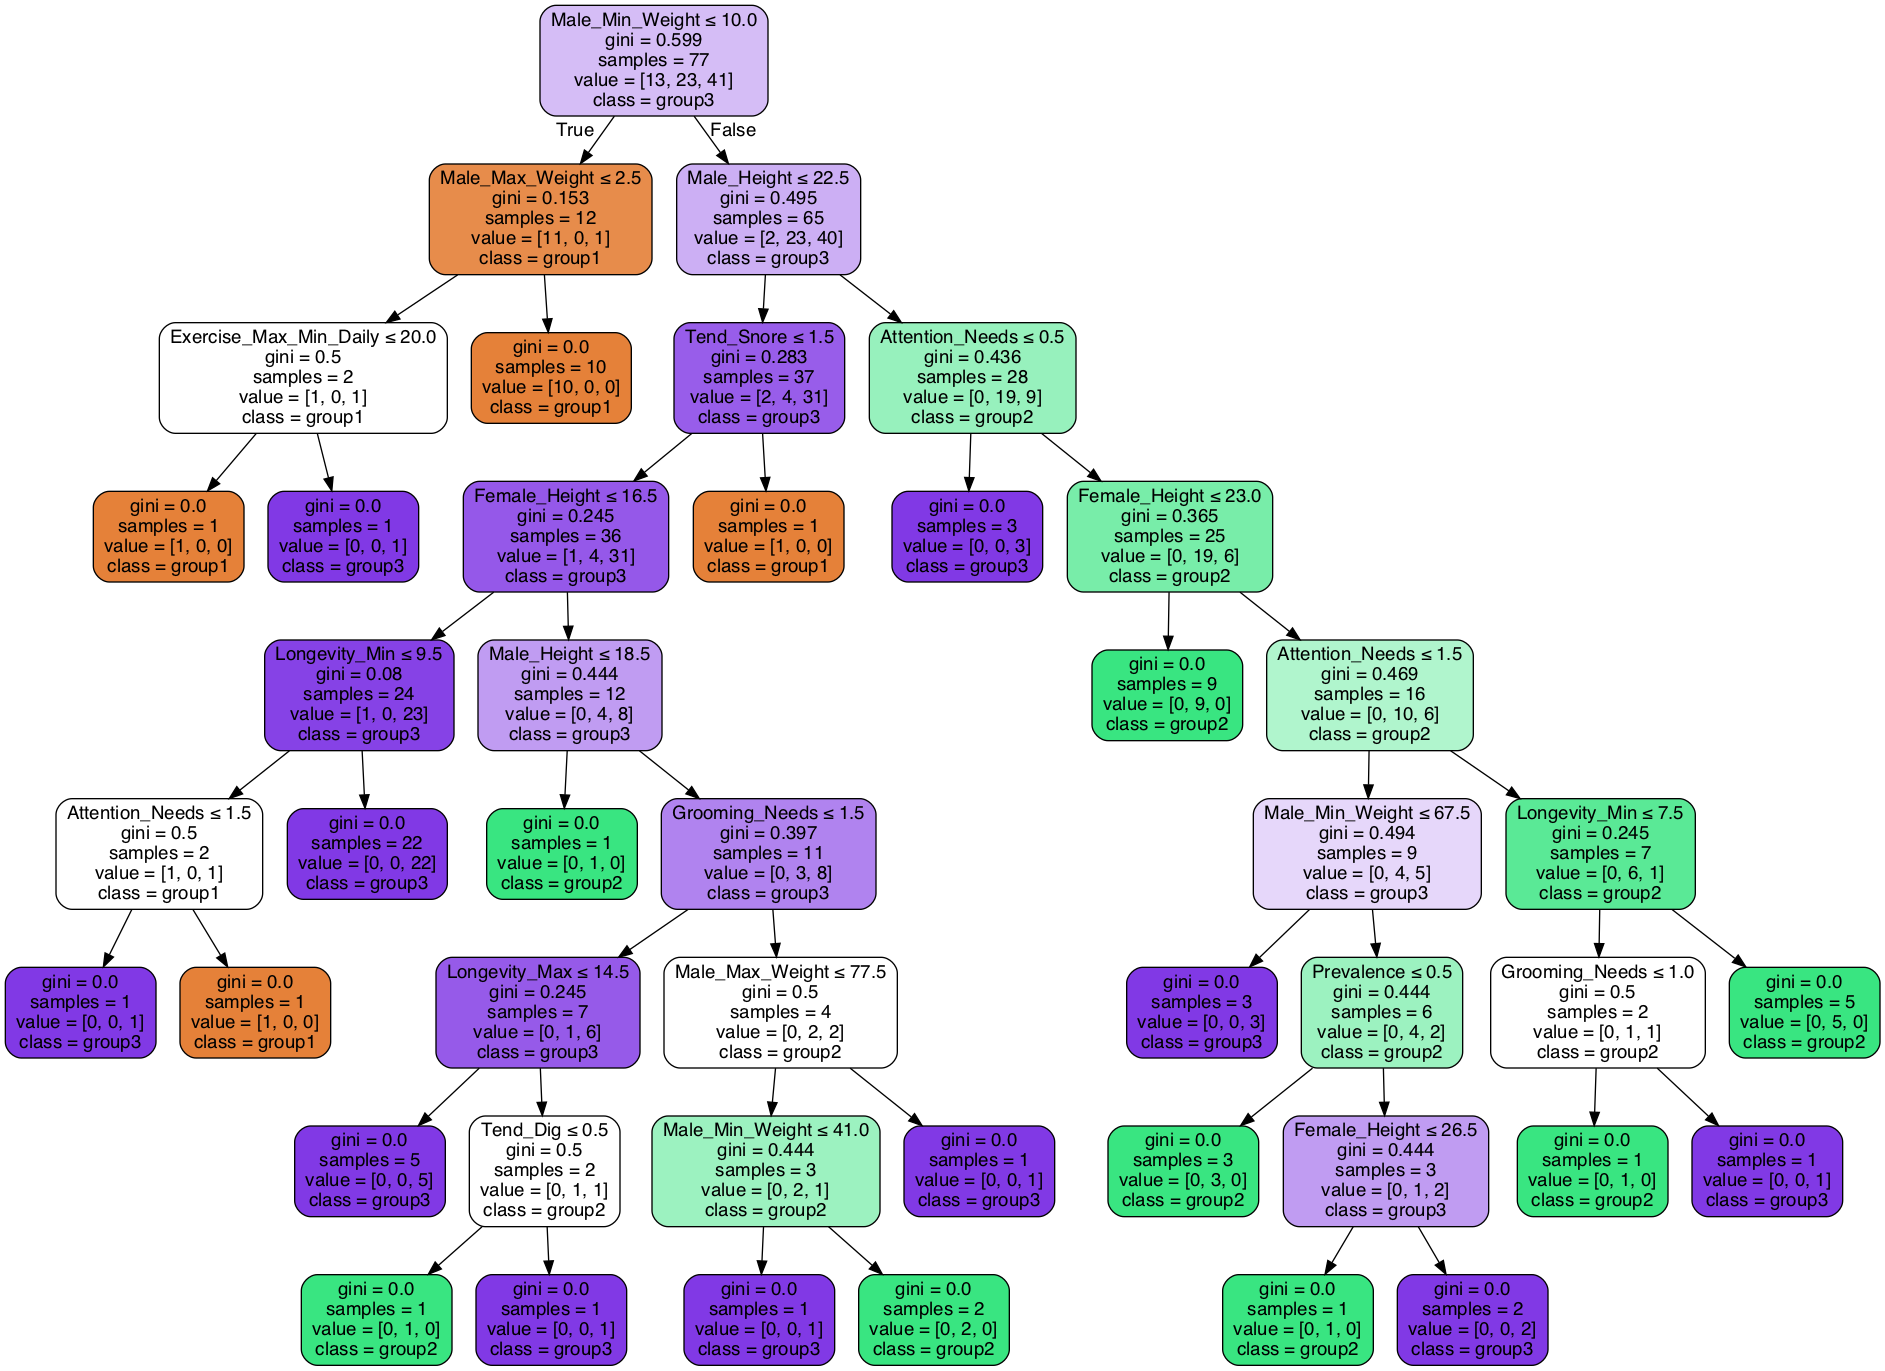

In [278]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import numpy as np
# Create DOT data
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_train.columns,
                           class_names=np.unique(Y).astype('str'),
                           filled=True, rounded=True, special_characters=True)
# Draw graph
graph = graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

# KNN

In [279]:
from sklearn.neighbors import KNeighborsClassifier

In [280]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler().fit(X_train)

# Transform the training and test sets
scaled_data_train = scaler.transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train)
scaled_df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.092394,0.0,0.119311,0.0,0.450754,0.527456,1.081591,0.482594,1.114773,0.709443,0.401650,-0.554989,-0.51484,0.138758,-0.637947,0.910168,1.293798,0.541779
1,0.049893,0.0,-0.221788,0.0,0.579780,0.644163,1.081591,0.482594,-0.673509,0.242545,-0.005285,-0.554989,-0.51484,0.138758,0.765537,-0.719667,0.000000,-0.803930
2,1.899625,0.0,1.711105,0.0,0.966859,-1.806687,1.081591,0.482594,-2.461790,-1.158150,-1.226090,2.202053,3.08904,-1.196792,-0.637947,-0.719667,0.000000,-0.803930
3,0.334467,0.0,0.233010,0.0,0.450754,0.644163,1.081591,0.482594,1.114773,0.242545,0.401650,-0.554989,-0.51484,-1.196792,-0.637947,-0.719667,-1.293798,-0.803930
4,-0.376968,0.0,-0.221788,0.0,-0.065351,0.177334,-0.653461,0.482594,1.114773,-0.224354,-0.005285,2.202053,-0.51484,1.474309,-0.637947,-0.719667,-1.293798,1.887489


In [364]:
# Instantiate KNeighborsClassifier
Kclf = KNeighborsClassifier(n_neighbors= 7)

# Fit the classifier
Kclf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = Kclf.predict(scaled_data_test)

KNN_eva=evaluate(y_test, test_preds, 'KNN')

In [289]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average= None)))
    print("Recall Score: {}".format(recall_score(labels, preds, average=None)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average= None)))
    
print_metrics(y_test, test_preds)

Precision Score: [0.66666667 0.5        0.72727273]
Recall Score: [0.5        0.6        0.72727273]
Accuracy Score: 0.65
F1 Score: [0.57142857 0.54545455 0.72727273]


In [490]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average="micro")
        if f1 > best_score:
            best_k = k
            best_score = f1
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [491]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 7
F1-Score: 0.65


# BAGGIN TREES FORREST

In [292]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

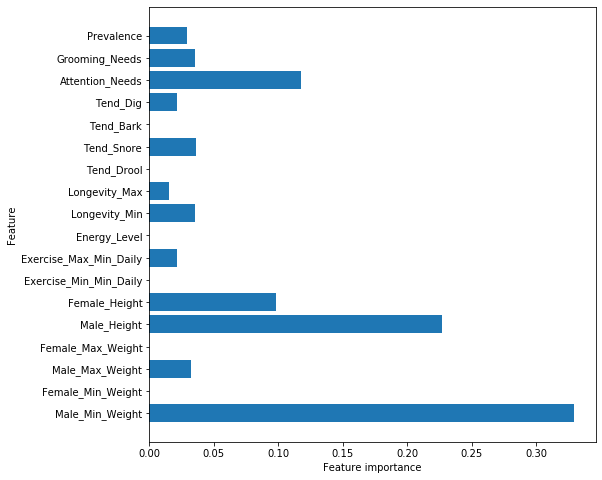

In [293]:
sds=clf.feature_importances_
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [295]:
pred = clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0]
 [0 4 1]
 [1 4 6]]
              precision    recall  f1-score   support

      group1       0.80      1.00      0.89         4
      group2       0.50      0.80      0.62         5
      group3       0.86      0.55      0.67        11

    accuracy                           0.70        20
   macro avg       0.72      0.78      0.72        20
weighted avg       0.76      0.70      0.70        20



In [296]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))


Testing Accuracy for Decision Tree Classifier: 70.0%


In [297]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=7), 
                                 n_estimators=20)

In [298]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [382]:
bagg_pred= bagged_tree.predict(X_test)
bagg_pred

array(['group3', 'group1', 'group1', 'group3', 'group1', 'group1',
       'group2', 'group3', 'group3', 'group2', 'group3', 'group2',
       'group3', 'group2', 'group1', 'group2', 'group2', 'group3',
       'group2', 'group2'], dtype=object)

In [ ]:
Baggin_eva=evaluate(y_test, bagg_pred, 'Baggin')

In [299]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

1.0

In [300]:
bagged_tree.score(X_test, y_test)

0.5

# Random Forrests

In [301]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 7)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [302]:
forest.score(X_train, y_train)

1.0

In [379]:
forest_pred=forest.predict(X_test)

In [380]:
forest.score(X_test, y_test)
Forrests_eva=evaluate(y_test, forest_pred, 'Random Forrests')

# Boosting, Adaboost, Gradient boost, and XGBOOST

In [304]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [305]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [306]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [307]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [308]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [368]:
ADA_eva=evaluate(y_test, adaboost_test_preds, 'AdaBoost')
GBT_eva=evaluate(y_test, gbt_clf_test_preds, 'GBT')

In [309]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='micro')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7662337662337663
F1-Score: 0.7662337662337663

Model: Gradient Boosted Trees
Accuracy: 1.0
F1-Score: 1.0

Testing Metrics
Model: AdaBoost
Accuracy: 0.45
F1-Score: 0.45

Model: Gradient Boosted Trees
Accuracy: 0.45
F1-Score: 0.45


In [310]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[2, 0, 2],
       [0, 3, 2],
       [0, 7, 4]])

In [311]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[3, 0, 1],
       [0, 2, 3],
       [1, 6, 4]])

In [312]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

      group1       1.00      0.50      0.67         4
      group2       0.30      0.60      0.40         5
      group3       0.50      0.36      0.42        11

    accuracy                           0.45        20
   macro avg       0.60      0.49      0.50        20
weighted avg       0.55      0.45      0.46        20



In [494]:
gbt_classification_report = classification_report(y_test, clf_test_pred)
print(gbt_classification_report)

NameError: name 'clf_test_pred' is not defined

In [314]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

      group1       0.75      0.75      0.75         4
      group2       0.25      0.40      0.31         5
      group3       0.50      0.36      0.42        11

    accuracy                           0.45        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.49      0.45      0.46        20



In [315]:
from sklearn.model_selection import train_test_split, cross_val_score

In [316]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, df, Y, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):


ValueError: could not convert string to float: 'group3'

In [320]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, Y, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.6600668337510444


# XGBOOST

In [321]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

In [371]:
# Instantiate XGBClassifier
XG_clf = XGBClassifier()

# Fit XGBClassifier
XG_clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = XG_clf.predict(X_train)
XG_test_preds = XG_clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 60.0%


In [373]:
XGBoost_eva=evaluate(y_test, XG_test_preds, 'XGBoost')
XGBoost_eva

['XGBoost',
 array([0.8       , 0.33333333, 0.66666667]),
 array([1.        , 0.4       , 0.54545455]),
 0.6,
 array([0.88888889, 0.36363636, 0.6       ])]

In [323]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [7],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [324]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 7
n_estimators: 100
subsample: 0.7

Training Accuracy: 100.0%
Validation accuracy: 65.0%


# SVM

In [337]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [343]:
# Print the coefficients
svm_pred= svm_clf.predict(X_test)

In [339]:
svm_pred

array(['group2', 'group3', 'group1', 'group2', 'group3', 'group1',
       'group3', 'group3', 'group3', 'group3', 'group3', 'group3',
       'group3', 'group3', 'group1', 'group2', 'group3', 'group2',
       'group3', 'group2'], dtype=object)

In [375]:
print_metrics(y_test, svm_pred)
SVM_eva=evaluate(y_test, svm_pred, 'SVM')

Precision Score: [1.         0.4        0.66666667]
Recall Score: [0.75       0.4        0.72727273]
Accuracy Score: 0.65
F1 Score: [0.85714286 0.4        0.69565217]


TypeError: Image data of dtype object cannot be converted to float

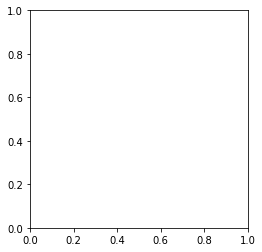

In [353]:
conf_metrix(svm_clf)

In [398]:
def evaluate(test, pred, model):
    return [model, precision_score(test, pred, average= None), recall_score(test, pred, average= None), accuracy_score(test, pred), f1_score(test, pred, average= None)]
# print metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average= None)))
    print("Recall Score: {}".format(recall_score(labels, preds, average= None)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average= None)))
# plot confusion metrix
def conf_metrix(model):
    # Create the basic matrix
    plt.imshow(model,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = model.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(model.shape[0]), range(model.shape[1])):
            plt.text(j, i, model[i, j],
                     horizontalalignment='center',
                     color='white' if model[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar()
    plt.show()

# Logistic Regression

In [383]:

from sklearn.linear_model import LogisticRegression

In [391]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler().fit(X_train)
X_train_sca = min_max.transform(X_train)
X_test_sca = min_max.transform(X_test)

# created model
# check the running time
import time
start = time.time()
log_clf = LogisticRegression()
log_clf.fit(X_train_sca, y_train)
log_runtime = time.time() - start

# prediction of  the test set
log_pred = log_clf.predict(X_test_sca)

# evaluated metrix for result table
log_eva = evaluate(y_test, log_pred, 'Logistic Regression ')

In [392]:
log_eva

['Logistic Regression ',
 array([0.        , 0.4       , 0.57142857]),
 array([0.        , 0.4       , 0.72727273]),
 0.5,
 array([0.  , 0.4 , 0.64])]

# Results

In [469]:
def evaluate(test, pred, model):
    return [model, precision_score(test, pred, average= None), recall_score(test, pred, average= None), accuracy_score(test, pred), f1_score(test, pred, average= None)]
# print metrics

In [470]:
log_eva = evaluate(y_test, log_pred, 'Logistic Regression ')
Tree_eva=evaluate(y_test, clf_grid_pred, 'Decision Tree')
Baggin_eva=evaluate(y_test, bagg_pred, 'Baggin')
Forrests_eva=evaluate(y_test, forest_pred, 'Random Forrests')
KNN_eva=evaluate(y_test, test_preds, 'KNN')
ADA_eva=evaluate(y_test, adaboost_test_preds, 'AdaBoost')
GBT_eva=evaluate(y_test, gbt_clf_test_preds, 'GBT')
XGBoost_eva=evaluate(y_test, XG_test_preds, 'XGBoost')
SVM_eva=evaluate(y_test, svm_pred, 'SVM')

In [471]:
results= pd.DataFrame()

In [472]:
results= results.append([log_eva, Tree_eva, Baggin_eva, Forrests_eva, KNN_eva, ADA_eva, GBT_eva, XGBoost_eva, SVM_eva])


In [473]:
results.columns=["Model", "Precision Score", "Recall Score", "Accuracy Score", "F1 Score"]

In [474]:
results

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,Logistic Regression,"[0.0, 0.4, 0.5714285714285714]","[0.0, 0.4, 0.7272727272727273]",0.50,"[0.0, 0.4000000000000001, 0.64]"
1,Decision Tree,"[0.8, 0.36363636363636365, 0.75]","[1.0, 0.8, 0.2727272727272727]",0.55,"[0.888888888888889, 0.5000000000000001, 0.3999..."
2,Baggin,"[0.8, 0.25, 0.5714285714285714]","[1.0, 0.4, 0.36363636363636365]",0.50,"[0.888888888888889, 0.3076923076923077, 0.4444..."
3,Random Forrests,"[0.8, 0.3, 0.6]","[1.0, 0.6, 0.2727272727272727]",0.50,"[0.888888888888889, 0.4, 0.37499999999999994]"
4,KNN,"[0.8, 0.3333333333333333, 0.6666666666666666]","[1.0, 0.4, 0.5454545454545454]",0.60,"[0.888888888888889, 0.3636363636363636, 0.6]"
5,AdaBoost,"[1.0, 0.3, 0.5]","[0.5, 0.6, 0.36363636363636365]",0.45,"[0.6666666666666666, 0.4, 0.4210526315789474]"
6,GBT,"[0.75, 0.25, 0.5]","[0.75, 0.4, 0.36363636363636365]",0.45,"[0.75, 0.3076923076923077, 0.4210526315789474]"
7,XGBoost,"[0.8, 0.3333333333333333, 0.6666666666666666]","[1.0, 0.4, 0.5454545454545454]",0.60,"[0.888888888888889, 0.3636363636363636, 0.6]"
8,SVM,"[1.0, 0.4, 0.6666666666666666]","[0.75, 0.4, 0.7272727272727273]",0.65,"[0.8571428571428571, 0.4000000000000001, 0.695..."


In [475]:
def evaluate_weighted(test, pred, model):
    return [model, precision_score(test, pred, average= "weighted"), recall_score(test, pred, average= "weighted"), accuracy_score(test, pred), f1_score(test, pred, average= "weighted")]
# print metrics

In [476]:
log_eva2 = evaluate_weighted(y_test, log_pred, 'Logistic Regression ')
Tree_eva2=evaluate_weighted(y_test, clf_grid_pred, 'Decision Tree')
Baggin_eva2=evaluate_weighted(y_test, bagg_pred, 'Baggin')
Forrests_eva2=evaluate_weighted(y_test, forest_pred, 'Random Forrests')
KNN_eva2=evaluate_weighted(y_tesresults_weighted= pd.DataFrame()t, test_preds, 'KNN')
ADA_eva2=evaluate_weighted(y_test, adaboost_test_preds, 'AdaBoost')
GBT_eva2=evaluate_weighted(y_test, gbt_clf_test_preds, 'GBT')
XGBoost_eva2=evaluate_weighted(y_test, XG_test_preds, 'XGBoost')
SVM_eva2=evaluate_weighted(y_test, svm_pred, 'SVM')

In [483]:
results_weighted= pd.DataFrame()

In [484]:
results_weighted= results_weighted.append([log_eva2, Tree_eva2, Baggin_eva2, Forrests_eva2, KNN_eva2, ADA_eva2, GBT_eva2, XGBoost_eva2, SVM_eva2])


In [486]:
results_weighted.columns=["Model", "Precision Score", "Recall Score", "Accuracy Score", "F1 Score"]

In [487]:
results_weighted

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,Logistic Regression,0.414286,0.50,0.50,0.452000
1,Decision Tree,0.663409,0.55,0.55,0.522778
2,Baggin,0.536786,0.50,0.50,0.499145
3,Random Forrests,0.565000,0.50,0.50,0.484028
4,KNN,0.610000,0.60,0.60,0.598687
5,AdaBoost,0.550000,0.45,0.45,0.464912
6,GBT,0.487500,0.45,0.45,0.458502
7,XGBoost,0.610000,0.60,0.60,0.598687
8,SVM,0.666667,0.65,0.65,0.654037


In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))